In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Input, Conv2D, MaxPooling2D,  Conv2DTranspose, UpSampling2D
from keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()
img_h, img_w = 28, 28 
channel = 1

In [3]:
X_train = X_train.reshape(X_train.shape[0], img_h, img_w, channel)
X_test = X_test.reshape(X_test.shape[0], img_h, img_w, channel)
input_shape = (img_h, img_w, channel)

In [4]:
X_train = X_train/255
X_test  = X_test/255

y_train = X_train
y_test = X_test

noise_factor = 0.5
X_train = X_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test = X_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train = np.clip(X_train, 0.0, 1.0)
X_test = np.clip(X_test, 0.0, 1.0)

In [5]:
input_layer = Input(input_shape)

x = Conv2D(filters=8, kernel_size=5, activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, 2, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
encoded = x

x = UpSampling2D(size=(2, 2))(x)
x = Conv2DTranspose(filters=16, kernel_size=2, activation='relu')(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2DTranspose(filters=8, kernel_size= 5, activation='relu')(x)
x = Conv2DTranspose(channel, 3, activation='sigmoid')(x)

model = Model(inputs= input_layer, outputs=x)

In [6]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 11, 11, 16)       

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x=X_train, y=y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test))

1875/1875 [==============================] - 84s 45ms/step - loss: 0.1429 - val_loss: 0.1153


In [8]:
#model.save('encoder_weights.h5')
#model.load_weights('encoder_weights.h5)

In [9]:
img_no = 356

sample = X_test[img_no]
pred = model.predict(np.array([sample]))[0]
X_img = sample.reshape(28, 28)
y_img = y_test[img_no].reshape(28, 28)
pred_img = pred.reshape(28, 28) 

Input Noisy Image


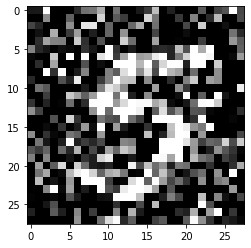

In [10]:
print("Input Noisy Image")
plt.imshow(X_img, cmap='gray')

Predicted Outpt Image


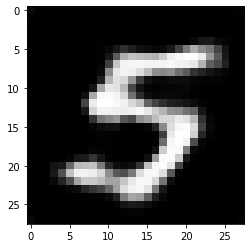

In [11]:
print('Predicted Outpt Image')
plt.imshow(pred_img, cmap='gray')

Target Image


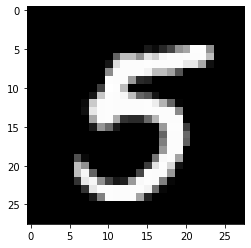

In [12]:
print('Target Image')
plt.imshow(y_img, cmap='gray')